##### Business Intelligence - Tarea Laboratorio 01 25-03-24  
by Montero Tabori Melany Valeria 
Caso: Ingreso Presupuestal de los Organismos Públicos Descentralizados Regionales y Municipales en los años 2021 al 2023- UNMSM

## Acerca del conjunto de datos

Contexto

Este es el conjunto de datos utilizado en la sección "ANN (Artificial Neural Networks)" del curso de Udemy de Kirill Eremenko (Científico de datos y experto en sistemas Forex) y Hadelin de Ponteves (Científico de datos), llamado Deep Learning AZ™: Hands-On Artificial Redes neuronales . El conjunto de datos es muy útil para los principiantes en el aprendizaje automático y es un campo de juego sencillo donde comparar varias técnicas/habilidades.

Se puede descargar gratuitamente aquí: https://www.superdatascience.com/deep-learning/

Objetivo de estudio:
Un banco está investigando una tasa muy alta de clientes que abandonan el banco. Aquí hay un conjunto de datos de 10.000 registros para investigar y predecir cuáles de los clientes tienen más probabilidades de abandonar el banco pronto.

Los atributos de esta dataset es:

1. RowNumber
1. CustomerId
1. Surname
1. CreditScore
1. Geography
1. Gender
1. Age
1. Tenure
1. Balance
1. NumOfProducts
1. HasCrCard
1. IsActiveMember
1. EstimatedSalary
1. Exited

Conten:
1. Load and Check Data
1. Data Visualization
1. Feature Engineering
1. Modeling Train - Test Split
1. Standardization

In [25]:
#!pip install tensorflow

In [26]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

In [27]:
#Importación de paquetes 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler

#from keras.utils import to_categorical
#import tensorflow as tf
#from tensorflow import keras


1. Load and Check Data

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/MelanyM20/BI/main/2023-2021%20Ingresos-OPDS.csv', sep=';', encoding='unicode_escape').astype(str)
#data=pd.read_csv("C:\Users\Montero\Documents\INTELIGENCIA DE NEGOCIOS\2023-2021 Ingresos-OPDS.csv")

In [4]:
data.head()

,ANO_DOC,MES_DOC,GRUPO_ENTIDAD,GRUPO_ENTIDAD_NOMBRE,SEC_EJEC,EJECUTORA,EJECUTORA_NOMBRE,DEPARTAMENTO_EJECUTORA,DEPARTAMENTO_EJECUTORA_NOMBRE,PROVINCIA_EJECUTORA,...,SUBGENERICA_NOMBRE,SUBGENERICA_DET,SUBGENERICA_DET_NOMBRE,ESPECIFICA,ESPECIFICA_NOMBRE,ESPECIFICA_DET,ESPECIFICA_DET_NOMBRE,MONTO_PIA,MONTO_PIM,MONTO_RECAUDADO
0,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,IMPUESTO SOBRE EL COMERCIO Y LAS TRANSACCIONES...,1,IMPUESTOS A LAS IMPORTACIONES,1,DERECHOS DE ADUANAS Y OTROS DERECHOS DE IMPORT...,4,ARANCEL ESPECIAL POR INGRESO DE BIENES PROVENI...,9268555,9268555,0.0
1,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,VENTA DE BIENES,3,VENTA DE PRODUCTOS MINERALES,1,VENTA DE PRODUCTOS MINERALES,1,VENTA DE AGUA,92640,92640,0.0
2,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,DERECHOS Y TASAS ADMINISTRATIVOS,1,DERECHOS ADMINISTRATIVOS GENERALES,4,OTROS DERECHOS ADMINISTRATIVOS GENERALES,99,OTROS DERECHOS ADMINISTRATIVOS GENERALES,11060,11060,0.0
3,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,DERECHOS Y TASAS ADMINISTRATIVOS,9,DERECHOS ADMINISTRATIVOS DE INDUSTRIA Y COMERCIO,1,DERECHOS ADMINISTRATIVOS DE INDUSTRIA Y COMERCIO,99,OTROS DERECHOS ADMINISTRATIVOS DE INDUSTRIA Y ...,1895003,1895003,0.0
4,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,DERECHOS Y TASAS ADMINISTRATIVOS,10,OTROS DERECHOS ADMINISTRATIVOS,1,OTROS DERECHOS ADMINISTRATIVOS,5,CERTIFICACIONES DIVERSAS,47587,47587,0.0


In [5]:
data.shape

(9553, 32)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9553 entries, 0 to 9552
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ANO_DOC                        9553 non-null   object
 1   MES_DOC                        9553 non-null   object
 2   GRUPO_ENTIDAD                  9553 non-null   object
 3   GRUPO_ENTIDAD_NOMBRE           9553 non-null   object
 4   SEC_EJEC                       9553 non-null   object
 5   EJECUTORA                      9553 non-null   object
 6   EJECUTORA_NOMBRE               9553 non-null   object
 7   DEPARTAMENTO_EJECUTORA         9553 non-null   object
 8   DEPARTAMENTO_EJECUTORA_NOMBRE  9553 non-null   object
 9   PROVINCIA_EJECUTORA            9553 non-null   object
 10  PROVINCIA_EJECUTORA_NOMBRE     9553 non-null   object
 11  DISTRITO_EJECUTORA             9553 non-null   object
 12  DISTRITO_EJECUTORA_NOMBRE      9553 non-null   object
 13  FUE

In [7]:
data.head().describe().T

,count,unique,top,freq
ANO_DOC,5,1,2023,5
MES_DOC,5,1,1,5
GRUPO_ENTIDAD,5,1,17,5
GRUPO_ENTIDAD_NOMBRE,5,1,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,5
SEC_EJEC,5,1,500108,5
EJECUTORA,5,1,0,5
EJECUTORA_NOMBRE,5,1,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,5
DEPARTAMENTO_EJECUTORA,5,1,23,5
DEPARTAMENTO_EJECUTORA_NOMBRE,5,1,TACNA,5
PROVINCIA_EJECUTORA,5,1,1,5


In [8]:
data["GRUPO_ENTIDAD_NOMBRE"].nunique()

2

In [9]:
data["EJECUTORA_NOMBRE"].nunique()

32

In [10]:
data.isnull().sum()

ANO_DOC                          0
MES_DOC                          0
GRUPO_ENTIDAD                    0
GRUPO_ENTIDAD_NOMBRE             0
SEC_EJEC                         0
EJECUTORA                        0
EJECUTORA_NOMBRE                 0
DEPARTAMENTO_EJECUTORA           0
DEPARTAMENTO_EJECUTORA_NOMBRE    0
PROVINCIA_EJECUTORA              0
PROVINCIA_EJECUTORA_NOMBRE       0
DISTRITO_EJECUTORA               0
DISTRITO_EJECUTORA_NOMBRE        0
FUENTE_FINANCIAMIENTO            0
FUENTE_FINANCIAMIENTO_NOMBRE     0
RUBRO                            0
RUBRO_NOMBRE                     0
TIPO_RECURSO                     0
TIPO_RECURSO_NOMBRE              0
GENERICA                         0
GENERICA_NOMBRE                  0
SUBGENERICA                      0
SUBGENERICA_NOMBRE               0
SUBGENERICA_DET                  0
SUBGENERICA_DET_NOMBRE           0
ESPECIFICA                       0
ESPECIFICA_NOMBRE                0
ESPECIFICA_DET                   0
ESPECIFICA_DET_NOMBR

In [11]:
data.head()

,ANO_DOC,MES_DOC,GRUPO_ENTIDAD,GRUPO_ENTIDAD_NOMBRE,SEC_EJEC,EJECUTORA,EJECUTORA_NOMBRE,DEPARTAMENTO_EJECUTORA,DEPARTAMENTO_EJECUTORA_NOMBRE,PROVINCIA_EJECUTORA,...,SUBGENERICA_NOMBRE,SUBGENERICA_DET,SUBGENERICA_DET_NOMBRE,ESPECIFICA,ESPECIFICA_NOMBRE,ESPECIFICA_DET,ESPECIFICA_DET_NOMBRE,MONTO_PIA,MONTO_PIM,MONTO_RECAUDADO
0,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,IMPUESTO SOBRE EL COMERCIO Y LAS TRANSACCIONES...,1,IMPUESTOS A LAS IMPORTACIONES,1,DERECHOS DE ADUANAS Y OTROS DERECHOS DE IMPORT...,4,ARANCEL ESPECIAL POR INGRESO DE BIENES PROVENI...,9268555,9268555,0.0
1,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,VENTA DE BIENES,3,VENTA DE PRODUCTOS MINERALES,1,VENTA DE PRODUCTOS MINERALES,1,VENTA DE AGUA,92640,92640,0.0
2,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,DERECHOS Y TASAS ADMINISTRATIVOS,1,DERECHOS ADMINISTRATIVOS GENERALES,4,OTROS DERECHOS ADMINISTRATIVOS GENERALES,99,OTROS DERECHOS ADMINISTRATIVOS GENERALES,11060,11060,0.0
3,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,DERECHOS Y TASAS ADMINISTRATIVOS,9,DERECHOS ADMINISTRATIVOS DE INDUSTRIA Y COMERCIO,1,DERECHOS ADMINISTRATIVOS DE INDUSTRIA Y COMERCIO,99,OTROS DERECHOS ADMINISTRATIVOS DE INDUSTRIA Y ...,1895003,1895003,0.0
4,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,DERECHOS Y TASAS ADMINISTRATIVOS,10,OTROS DERECHOS ADMINISTRATIVOS,1,OTROS DERECHOS ADMINISTRATIVOS,5,CERTIFICACIONES DIVERSAS,47587,47587,0.0


2. Data Visualization

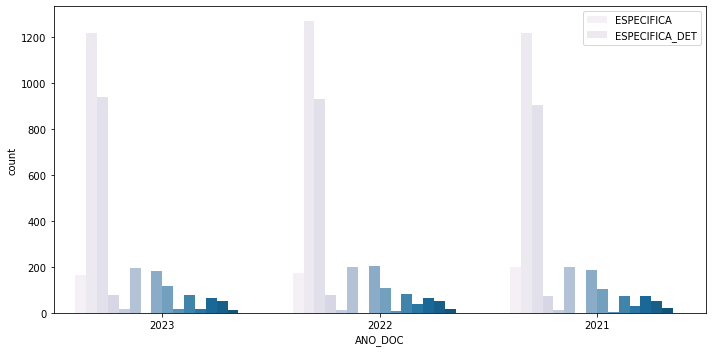

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="ANO_DOC", hue="ESPECIFICA_DET", palette="PuBu")
plt.legend(labels=["ESPECIFICA", "ESPECIFICA_DET"])
plt.tight_layout()
plt.show()


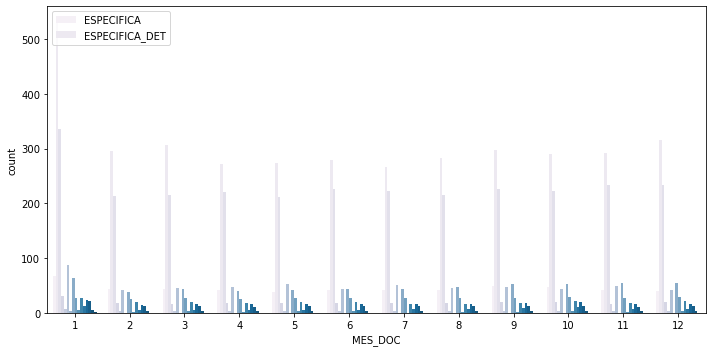

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x="MES_DOC",hue="ESPECIFICA_DET",palette="PuBu")
plt.legend(labels=["ESPECIFICA","ESPECIFICA_DET"])
plt.tight_layout()
plt.show()

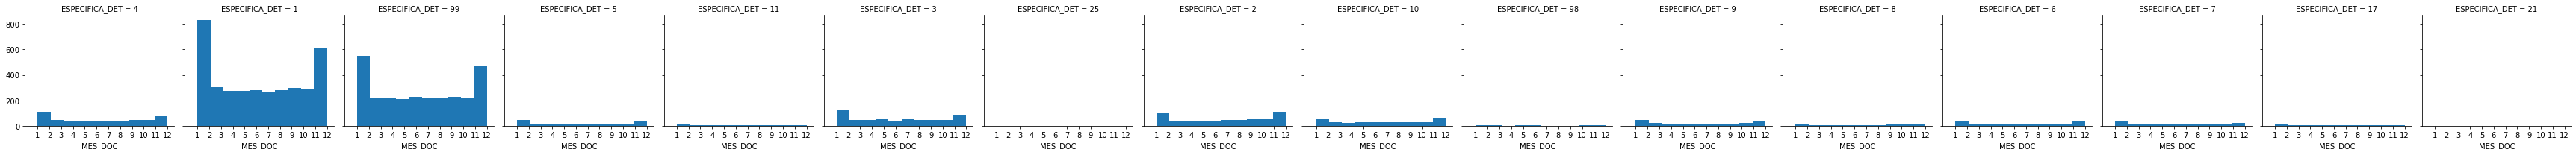

In [14]:
age=sns.FacetGrid(data,col='ESPECIFICA_DET')
age.map(plt.hist,'MES_DOC')

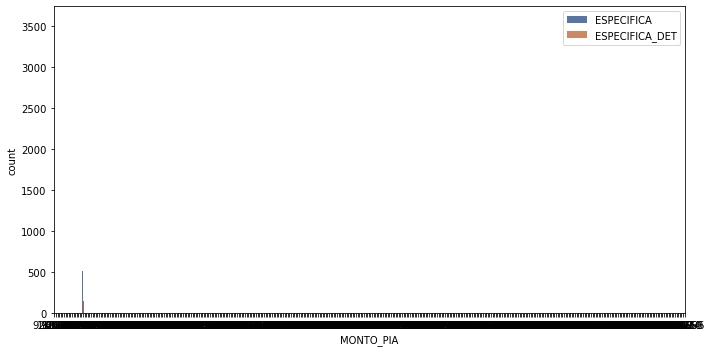

In [32]:

plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="MONTO_PIA", hue="ESPECIFICA_DET", palette="deep")
plt.legend(labels=["ESPECIFICA", "ESPECIFICA_DET"], loc="upper right")
plt.tight_layout()
plt.show()


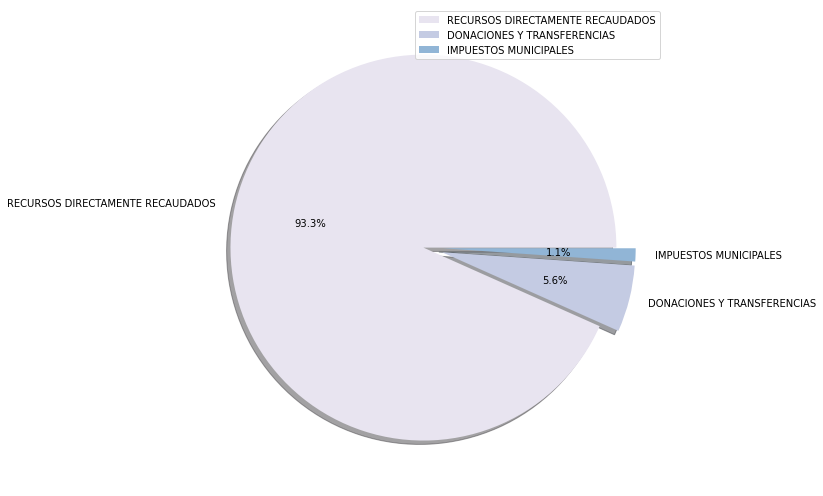

In [36]:
plt.figure(figsize=(10,7))
x_axis = data["RUBRO_NOMBRE"].value_counts()
figlabels = data["RUBRO_NOMBRE"].value_counts().index

# Verificar la longitud de x_axis y definir explode en consecuencia
if len(x_axis) == 3:
    explode = [0, 0.1, 0.1]  # Por ejemplo, dividir el pastel en tres partes
elif len(x_axis) == 2:
    explode = [0, 0.1]  # Por ejemplo, dividir el pastel en dos partes
else:
    explode = None  # No especificar explode si no se cumple ninguna de las condiciones anteriores

plt.pie(x=x_axis, labels=figlabels, autopct="%0.1f%%", explode=explode, shadow=True, colors=sns.color_palette("PuBu"))
plt.legend()
plt.tight_layout()
plt.show()


ValueError: 'label' must be of length 'x'

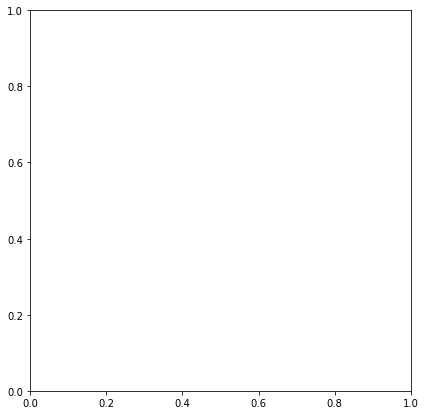

In [39]:
plt.figure(figsize=(10,7))
x_axis=data["EJECUTORA_NOMBRE"].value_counts()
figlabels=["ANO_DOC","MES_DOC"]
plt.pie(x=x_axis,labels=figlabels,autopct="%0.1f%%",explode=[0,0.1],shadow=True,colors=sns.color_palette("PuBu"))
plt.legend()
plt.tight_layout()
plt.show()

Normalización de datos

In [40]:
data["RUBRO_NOMBRE"]=LabelEncoder().fit_transform(data["RUBRO_NOMBRE"])
data["ESPECIFICA_DET"]=LabelEncoder().fit_transform(data["ESPECIFICA_DET"])

In [41]:
scaler=MinMaxScaler()

data["MONTO_RECAUDADO"]=scaler.fit_transform(data[["MONTO_RECAUDADO"]].values)
data["MONTO_PIA"]=scaler.fit_transform(data[["MONTO_PIA"]].values)
data["MONTO_PIM"]=scaler.fit_transform(data[["MONTO_PIM"]])

In [42]:
data = pd.read_csv('https://raw.githubusercontent.com/MelanyM20/BI/main/2023-2021%20Ingresos-OPDS.csv', sep=';', encoding='unicode_escape')
#data=pd.read_csv("C:\Users\Montero\Documents\INTELIGENCIA DE NEGOCIOS\2023-2021 Ingresos-OPDS.csv")

Codificador de datos

In [43]:
lb=LabelEncoder()
data['RUBRO']=lb.fit_transform(data['RUBRO'])

In [44]:
data.head()

,ANO_DOC,MES_DOC,GRUPO_ENTIDAD,GRUPO_ENTIDAD_NOMBRE,SEC_EJEC,EJECUTORA,EJECUTORA_NOMBRE,DEPARTAMENTO_EJECUTORA,DEPARTAMENTO_EJECUTORA_NOMBRE,PROVINCIA_EJECUTORA,...,SUBGENERICA_NOMBRE,SUBGENERICA_DET,SUBGENERICA_DET_NOMBRE,ESPECIFICA,ESPECIFICA_NOMBRE,ESPECIFICA_DET,ESPECIFICA_DET_NOMBRE,MONTO_PIA,MONTO_PIM,MONTO_RECAUDADO
0,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,IMPUESTO SOBRE EL COMERCIO Y LAS TRANSACCIONES...,1,IMPUESTOS A LAS IMPORTACIONES,1,DERECHOS DE ADUANAS Y OTROS DERECHOS DE IMPORT...,4,ARANCEL ESPECIAL POR INGRESO DE BIENES PROVENI...,9268555,9268555,0.0
1,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,VENTA DE BIENES,3,VENTA DE PRODUCTOS MINERALES,1,VENTA DE PRODUCTOS MINERALES,1,VENTA DE AGUA,92640,92640,0.0
2,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,DERECHOS Y TASAS ADMINISTRATIVOS,1,DERECHOS ADMINISTRATIVOS GENERALES,4,OTROS DERECHOS ADMINISTRATIVOS GENERALES,99,OTROS DERECHOS ADMINISTRATIVOS GENERALES,11060,11060,0.0
3,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,DERECHOS Y TASAS ADMINISTRATIVOS,9,DERECHOS ADMINISTRATIVOS DE INDUSTRIA Y COMERCIO,1,DERECHOS ADMINISTRATIVOS DE INDUSTRIA Y COMERCIO,99,OTROS DERECHOS ADMINISTRATIVOS DE INDUSTRIA Y ...,1895003,1895003,0.0
4,2023,1,17,ORGANISMOS PUBLICOS DESCENTRALIZADOS REGIONALES,500108,0,COMITE DE ADMINISTRACIÃN DE LA ZONA FRANCA Y ...,23,TACNA,1,...,DERECHOS Y TASAS ADMINISTRATIVOS,10,OTROS DERECHOS ADMINISTRATIVOS,1,OTROS DERECHOS ADMINISTRATIVOS,5,CERTIFICACIONES DIVERSAS,47587,47587,0.0


In [ ]:
#data = pd.get_dummies(data, columns= ["Geography"])
#data = pd.get_dummies(data, columns= ["Gender"])
#data = pd.get_dummies(data, columns= ["NumOfProducts"])
#data.head()

In [45]:
print("Max PIA: ", data['MONTO_PIA'].max())
print("Min PIM: ", data['MONTO_PIM'].min())

Max PIA:  262758701
Min PIM:  0


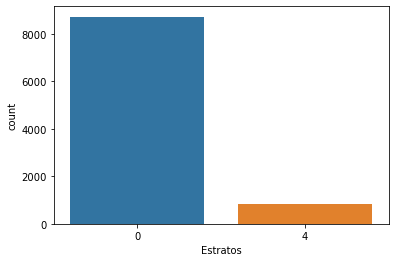

In [46]:
monto_pim = [0 if i < 38 else 1 if i <42  else 2 if i < 45 else 3 if i < 60 else 4 for i in data["MONTO_PIM"]]
data["Estratos"] = monto_pim

sns.countplot(x = "Estratos", data = data)
plt.show()

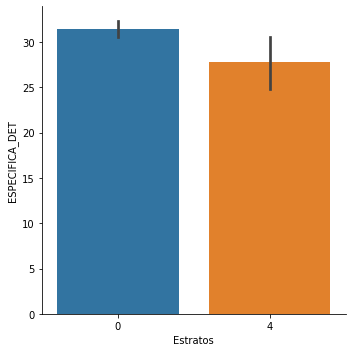

In [47]:
g = sns.catplot(x = "Estratos", y = "ESPECIFICA_DET", data = data, kind = "bar")
g.set_ylabels("ESPECIFICA_DET")
plt.show()

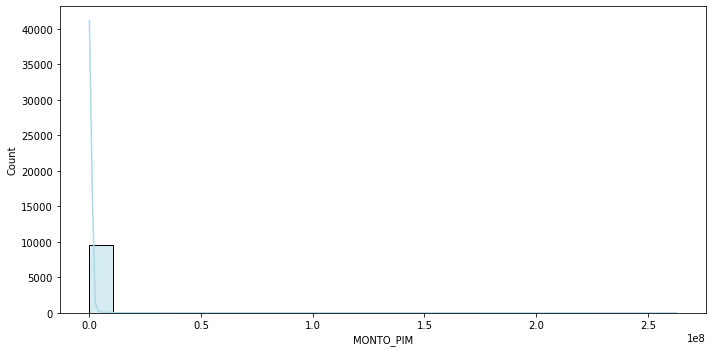

In [49]:
fig,ax=plt.subplots(figsize=(10,5))
sns.histplot(data["MONTO_PIM"],bins=25,kde=True,color="lightblue",ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(data, hue="ESPECIFICA_DET")
plt.show
